First, make sure the notebook is aware of the workshop data sets

In [1]:
!git clone https://github.com/icomse/8th_workshop_MachineLearning.git
import os
os.chdir('8th_workshop_MachineLearning/data')

  Using cached ase-3.22.1-py3-none-any.whl (2.2 MB)
Cloning into '5th_workshop_MachineLearning'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 24 (delta 5), reused 13 (delta 2), pack-reused 0
Receiving objects: 100% (24/24), 6.97 MiB | 1.68 MiB/s, done.
Resolving deltas: 100% (5/5), done.


### Python's Numerical Ecosystem

In addition to Python's built-in modules like the ``math`` module we explored above, there are also many often-used third-party modules that are core tools for doing data science with Python.
Some of the most important ones are:

#### [``numpy``](http://numpy.org/): Numerical Python

Numpy is short for "Numerical Python", and contains tools for efficient manipulation of arrays of data.
If you have used other computational tools like IDL or MatLab, Numpy should feel very familiar.

#### [``scipy``](http://scipy.org/): Scientific Python

Scipy is short for "Scientific Python", and contains a wide range of functionality for accomplishing common scientific tasks, such as optimization/minimization, numerical integration, interpolation, and much more.
We will not look closely at Scipy today, but we will use its functionality later in the course.

#### [``pandas``](http://pandas.pydata.org/): Labeled Data Manipulation in Python

Pandas is short for "Panel Data", and contains tools for doing more advanced manipulation of labeled data in Python, in particular with a columnar data structure called a *Data Frame*.
If you've used the [R](http://rstats.org) statistical language (and in particular the so-called "Hadley Stack"), much of the functionality in Pandas should feel very familiar.

#### [``matplotlib``](http://matplotlib.org): Visualization in Python

Matplotlib started out as a Matlab plotting clone in Python, and has grown from there in the 15 years since its creation. It is the most popular data visualization tool currently in the Python data world (though other recent packages are starting to encroach on its monopoly). We will get to this next time. 

#### [``sklearn``](https://scikit-learn.org) scikit-learn; flexible and easy ML and data analysis package

scikit-learn is an easy general use a python package for machine learning. It is NOT the highest performing package (you would need accelerators like Keras or pytorch for that), but puts most of the useful approaches and models together in a single package that can run most anywhere.  You probably won't use it for analyzing millions of data points or developing new methods, but for small and medium size jobs, it works great.


# `numpy`, your Matlab-like friend

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 

`numpy` has the advantage over MATLAB in that it is a library that is *part* of Python (so you can extensibly use any of the other Python functionality) and it is *free*, unlike MATLAB, which is rather expensive (the university pays your subscription while you are here, but many companies do not have subscriptions!) It is **not** alone as fully capable as MATLAB, and it is frequently a bit harder to do a number of complex things in Python + numpy than it is in MATLAB. However, with the other Python modules, you can do pretty much anything you can in MATLAB. `numpy` is the 'vanilla' implementation of MATLAB data types; you need `scipy`,`matplotlib`,`pandas`, and other tools to do a lot of those other things.

To use `numpy` you need to import the module, using for example:

In [5]:
import numpy as np

We'll call this enough it's worth renaming it `np` to save typing three other characters. In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is *array*. 



## Creating `numpy` arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, `zeros`, etc.
* reading data from files

### Creating arrays from python lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function, which takes the Python list, and returns a new array with those entries.

In [6]:
# a vector: the argument to the array function is a Python list
l = [1,2,3,4] # a Python list
print(type(l)) # see, a list
v = np.array([1,2,3,4])  # create a numpy array with the same elements as this list
print(type(v)) # a new type
print(type(l)) #l is still the same, v was created from l, but l wasn't changed.

<class 'list'>
<class 'numpy.ndarray'>
<class 'list'>


In [7]:
l

[1, 2, 3, 4]

In [8]:
v

array([1, 2, 3, 4])

In [9]:
# a matrix: the argument to the array function is a nested Python list
# it's still type "array"
M = np.array([[1, 2], [3, 4]])
print(M)

[[1 2]
 [3 4]]


The `v` and `M` objects are both of the type `ndarray` that the `numpy` module provides.

In [10]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

The difference between the `v` and `M` arrays is only their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [11]:
v.shape  # a length 4 array.  It's ALMOST the same thing as 
         # a length 4x1 matrix; in some rare cases, the difference matters. 

(4,)

In [12]:
M.shape

(2, 2)

The number of elements in the array is available through the `ndarray.size` property:

In [13]:
M.size

4

Equivalently, we could use the function `numpy.shape` and `numpy.size` - these functions just return the properties of the objects.

In [14]:
np.shape(M)

(2, 2)

In [15]:
np.size(M)

4

So far the `numpy.ndarray` looks awfully much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type? 

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed (i.e. the type of data can change). They do not support mathematical functions such as matrix and dot multiplications, etc. Implementing such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when the array is created -- all integers, all float, all booleans.  A Python array can be a list of a bunch of different things.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language, like C and Fortran.  So if you use numpy functions with numpy arrays, it is usually **much, much** faster than Python alone.

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array contains:

In [16]:
M.dtype

dtype('int64')

We get an error if we try to assign a value of the wrong type to an element in a numpy array. Python doesn't care, as it will just redefine and resize the list, but numpy does because it has already allocated a fixed amount of memory for the data.

In [17]:
M[0,0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

The problem was that it was declared as an array of integers, and we are trying to put strings into it!

If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument. Since numpy by default creates floats, you frequently have to do this if you want integers or booleans.

In [18]:
M = np.array([[1, 2], [3, 4]], dtype=complex)
M

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

In [19]:
M = np.array([[1, 2], [3, 4]],dtype='int')

In [20]:
M.dtype

dtype('int64')

Common data types that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, `object`, etc.

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`. This can be useful if we know we need very high precision data.  `float64` and `int32` are the defaults.

### Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generate arrays of different forms. Some of the more common are:

#### arange

In [21]:
# create a range of numbers
x = np.arange(0, 10, 1) # arguments: start, stop, step
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
x = np.arange(-1, 1, 0.1)
x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

#### linspace and logspace
what do `linspace` and `logspace` do?  use the `?` to find out.

In [24]:
np.linspace?

In [25]:
np.logspace?

#### Creating random data arrays

In [26]:
# uniform random numbers in [0,1]
np.random.rand(5,5)

array([[0.05404594, 0.90346329, 0.06580949, 0.18767303, 0.46599233],
       [0.63693817, 0.41005448, 0.70404953, 0.99139214, 0.55515564],
       [0.12440302, 0.46198697, 0.33239113, 0.82783446, 0.86907236],
       [0.3479082 , 0.55783529, 0.67235685, 0.15595021, 0.85524582],
       [0.39875919, 0.83404172, 0.59127746, 0.17238925, 0.92843985]])

In [27]:
# standard normal distributed random numbers
np.random.randn(5,5)

array([[-0.50002337,  0.17557541, -0.10996748, -0.89112043,  0.52201075],
       [-1.0668272 , -0.1607199 , -0.13809995, -0.25619496,  0.23944132],
       [ 0.9710628 , -0.01261614,  0.43198687, -1.24867062,  1.12002484],
       [ 0.02727451, -0.52806987, -1.08087252,  1.95122946, -0.34312277],
       [-0.30914612, -0.65436693,  1.47735863, -0.61869817, -0.08000609]])

**Try it yourself**:  What other sorts of arrays of random numbers can you create?

In [ ]:
help(np.random)

In [30]:
np.random.randint(low=-10,high=10,size=(5,5))

array([[-7,  2, -9, -7, -5],
       [-3, -9, -5, -7, -7],
       [ 5,  6, -1,  6,  1],
       [ 6, -3, -4, -5, -6],
       [-5, -3, -1, -8,  9]])

In [32]:
np.random.lognormal(size=(5,5))

array([[ 0.28481299,  0.18137647,  0.64906485,  0.32780438,  1.34265396],
       [ 2.00853562,  2.99153945,  1.2550101 ,  0.14209501,  3.34416423],
       [ 0.4375648 ,  1.80973805,  1.74110276,  1.12271015,  0.90730696],
       [ 0.5301733 ,  1.70047057,  0.42186372, 19.21151308,  0.41050411],
       [ 1.06200348,  0.42650924,  3.72815612,  0.44807247,  6.82216068]])

In [24]:
np.random.logistic(size=(5,5))

array([[ 0.75335847,  0.57648429,  3.1828936 ,  0.82275878,  0.40640204],
       [-2.03315151, -1.12638348,  0.31537608,  1.81405378, -0.04524215],
       [ 0.07951733,  0.16504811, -1.10678405,  3.48387745,  0.27645954],
       [ 0.3351659 ,  1.09323073,  0.55486606, -1.89602039, -0.90097427],
       [-2.07885422, -0.52668338, -0.66351034, -1.40523319,  0.35703374]])

#### diag

In [33]:
# a diagonal matrix
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [34]:
# diagonal with offset from the main diagonal
np.diag([1,2,3], k=1) 

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

What do the commands `zeros` and `ones` do?

In [36]:
np.zeros([5,5])

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [35]:
np.ones([5,5])

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

### Hacking time!

1. Create a 6 by 5 matrix of zeros and store in variable `zeros65`
1. Create an array of 11 equally spaced points from 0 and 20, inclusive.
1. Read the documentation for <tt>vstack</tt> and <tt>hstack</tt>. Then create the following array in Python and store it in variable <tt>M</tt>. Hint: How can you use <tt>vstack</tt>, <tt>identity</tt>, and <tt>zeros</tt> together?

$$ M = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \\ 0 & 0 & 0 \\ 0 & 0 & 0\end{bmatrix}$$

In [28]:
np.zeros([6,5])

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [29]:
np.linspace(0,20,11)

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.])

In [30]:
A = np.eye(3)
B = np.zeros([2,3])
C = np.vstack((A,B))
print(C)
np.shape(C)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]


(5, 3)

## File I/O

### Comma-separated values (CSV)

A very common file format for data files is comma-separated values (CSV), or related formats such as TSV (tab-separated values). To read data from such files into Numpy arrays we can use the `numpy.genfromtxt` function. For example, 

Using `numpy.savetxt` we can store a Numpy array to a file in CSV format:

In [37]:
M = np.random.rand(3,3)
M

array([[0.283211  , 0.46660818, 0.16739439],
       [0.72018523, 0.90675591, 0.65402903],
       [0.83011871, 0.84397465, 0.38890594]])

In [38]:
np.savetxt("random-matrix.csv", M)

In [39]:
data = np.genfromtxt('random-matrix.csv')
data

array([[0.283211  , 0.46660818, 0.16739439],
       [0.72018523, 0.90675591, 0.65402903],
       [0.83011871, 0.84397465, 0.38890594]])

In [40]:
data[0,0]

0.28321100123769594

In [41]:
np.savetxt("random-matrix.csv", M, fmt='%.5f') # fmt specifies the format

In [42]:
data = np.genfromtxt('random-matrix.csv')
data

array([[0.28321, 0.46661, 0.16739],
       [0.72019, 0.90676, 0.65403],
       [0.83012, 0.84397, 0.38891]])

### Numpy's native binary file format

Useful when storing and reading back numpy array data, as the data is stored in the same precision as it exists, rather than space-inefficient text. Use the functions `numpy.save` and `numpy.load`:

In [43]:
np.save("random-matrix.npy", M)

In [44]:
newmat = np.load("random-matrix.npy")
newmat

array([[0.283211  , 0.46660818, 0.16739439],
       [0.72018523, 0.90675591, 0.65402903],
       [0.83011871, 0.84397465, 0.38890594]])

## More properties of the numpy arrays

In [45]:
M.itemsize # bytes per element

8

In [46]:
M.ndim # number of dimensions

2

In [47]:
M.nbytes # number of bytes; the actual size in memory.

72

## Manipulating arrays

### Indexing

We can index elements in an array using square brackets and indices, same as with a list

`v` is a vector, and has only one dimension, accessed taking one index, like a list

In [48]:
v[1]

2

`M` is a matrix, or a 2 dimensional array.  We access the entries using TWO indices, separated by a comma

In [49]:
M[1,1]

0.906755912649568

If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array) 

In [50]:
M

array([[0.283211  , 0.46660818, 0.16739439],
       [0.72018523, 0.90675591, 0.65402903],
       [0.83011871, 0.84397465, 0.38890594]])

We can look at the entire first row of M using `:` instead of an index: 

In [51]:
M[1,:] # row 1

array([0.72018523, 0.90675591, 0.65402903])

Or the first column:

In [52]:
M[:,1] # column 1

array([0.46660818, 0.90675591, 0.84397465])

If we type `M[1]`, what will it return ?

In [55]:
M[1]

array([0.72018523, 0.90675591, 0.65402903])

We can assign new values to elements in an array using indexing:

In [56]:
M[0,0] = 1

In [57]:
M

array([[1.        , 0.46660818, 0.16739439],
       [0.72018523, 0.90675591, 0.65402903],
       [0.83011871, 0.84397465, 0.38890594]])

We can also assign entire rows and columns.  Note we are actually making multiple assignments at a time! It's really looping over the assignments under the hood.

In [58]:

M[1,:] = 0
M[:,2] = -1

In [59]:
M

array([[ 1.        ,  0.46660818, -1.        ],
       [ 0.        ,  0.        , -1.        ],
       [ 0.83011871,  0.84397465, -1.        ]])

You can also resize an array after creating it, changing the dimensions--as long as the total size remains the same.

In [60]:
A = np.array([2,4,6,8])
print("A is now a vector",A,"\n")
A = A.reshape(2,2)
print("A is now a matrix\n",A)
print("\nNow let's shape A back to a vector")
print(A.reshape(4))

A is now a vector [2 4 6 8] 

A is now a matrix
 [[2 4]
 [6 8]]

Now let's shape A back to a vector
[2 4 6 8]


### Index slicing

"Index slicing" is the technical name for the syntax `M[lower:upper:step]` to extract *part* of an array:

In [61]:
A = np.array([1,2,3,4,5,6])
A

array([1, 2, 3, 4, 5, 6])

In [62]:
A[1:3]

array([2, 3])

In [63]:
A[1::2]

array([2, 4, 6])

Array slices are *mutable*: if they are assigned a new value the original array from which the slice was extracted is modified:

In [64]:
A[1:4] = [-2,-3,-4]
A

array([ 1, -2, -3, -4,  5,  6])

We can omit any of the three parameters in `M[lower:upper:step]`:

In [65]:
A[::] # lower, upper, step all take the default values

array([ 1, -2, -3, -4,  5,  6])

In [66]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

In [67]:
A[:3] # first three elements

array([ 1, -2, -3])

In [68]:
A[3:] # elements from index 3

array([-4,  5,  6])

Negative indices counts from the end of the array (positive index from the begining):

In [69]:
A = np.array([1,2,3,4,5])

In [70]:
A[-1] # the last element in the array

5

In [71]:
A[-3:] # the last three elements; -3 is the 3rd to last, then all of them after that.

array([3, 4, 5])

Index slicing works exactly the same way for multidimensional arrays:  

In [72]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)]) # good review for list comprehension: what is this doing?
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [73]:
# a block from the original array
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [74]:
# taking every other row and column
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

### Fancy indexing

"Fancy indexing" is the name for when an array or list is used **in the place** of an index: 

In [75]:
row_indices = [0, 2, 4]
A[row_indices,:]

array([[ 0,  1,  2,  3,  4],
       [20, 21, 22, 23, 24],
       [40, 41, 42, 43, 44]])

In [76]:
col_indices = [1, 2, -1] # remember, index -1 means the last element
A[:,col_indices]

array([[ 1,  2,  4],
       [11, 12, 14],
       [21, 22, 24],
       [31, 32, 34],
       [41, 42, 44]])

What is this doing??

In [77]:
A[row_indices,col_indices]

array([ 1, 22, 44])

We can also use **index masks**: If the index mask is an Numpy array of data type `bool`, then an element is selected (`True`) or not (`False`) depending on the value of the index mask at the position of each element: 

In [78]:
B = np.array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [79]:
row_mask = np.array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [80]:
# same thing
row_mask = np.array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

This feature is very useful to conditionally select elements from an array, using for example comparison operators:

In [81]:
x = np.arange(0, 10, 0.5)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [82]:
x>5

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [83]:
(x < 7.5)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False])

In [84]:
mask = (x > 5) * (x < 7.5)
mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [85]:
x[mask]

array([5.5, 6. , 6.5, 7. ])

Put it all together:

In [86]:
x[(x > 5) * (x < 7.5)]  # think about what this is doing!

array([5.5, 6. , 6.5, 7. ])

### where

The index mask can be converted to position index using the `where` function

In [87]:
indices = np.where(mask)
indices

(array([11, 12, 13, 14]),)

In [88]:
x[indices] # this indexing is equivalent to the fancy indexing x[mask]

array([5.5, 6. , 6.5, 7. ])

### diag

With the diag function we can also extract the diagonal and subdiagonals of an array:

In [89]:
np.diag(A)

array([ 0, 11, 22, 33, 44])

In [90]:
np.diag(A, -1)

array([10, 21, 32, 43])

### Hacking time!
With a partner, generate a `numpy` array from 1 to 2013 that contains only numbers that are not divisible by 7. **Use only array commands** (i.e. don't using `for` or something else to loop over the elements one by one)

In [91]:
# more explicit in the steps
x = np.arange(1,2023)
mask = (x%7!=0)
y = x[mask]
print(y[4:20]) # you can see that the multiples of 7's are missing
print(6/7*2023)
print(np.size(y))  # the size is consistsnt with 6/7*(2021) up to rounding.

[ 5  6  8  9 10 11 12 13 15 16 17 18 19 20 22 23]
1734.0
1734


In [92]:
#more compact
x = np.arange(1,2023)
y = x[x%7!=0]
print(y[4:20]) # you can see that the multiples of 7's are missing

[ 5  6  8  9 10 11 12 13 15 16 17 18 19 20 22 23]


In [93]:
# another way
x = np.arange(1,2023)
indices = np.where(x%7!=0)
y = x[indices]
print(y[4:20]) # you can see that the multiples of 7's are missing

[ 5  6  8  9 10 11 12 13 15 16 17 18 19 20 22 23]


## Linear algebra

**Vectorizing code** is the key to writing efficient numerical calculation with Python and Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.

### Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers. Can you describe what the following do?

In [94]:
v1 = np.arange(0, 5)

In [95]:
v1 * 2

array([0, 2, 4, 6, 8])

In [96]:
v1 + 2

array([2, 3, 4, 5, 6])

In [97]:
A * 2, A + 2

(array([[ 0,  2,  4,  6,  8],
        [20, 22, 24, 26, 28],
        [40, 42, 44, 46, 48],
        [60, 62, 64, 66, 68],
        [80, 82, 84, 86, 88]]),
 array([[ 2,  3,  4,  5,  6],
        [12, 13, 14, 15, 16],
        [22, 23, 24, 25, 26],
        [32, 33, 34, 35, 36],
        [42, 43, 44, 45, 46]]))

### Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations:

In [98]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [99]:
A * A # element-wise multiplication

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [100]:
v1 * v1

array([ 0,  1,  4,  9, 16])

If we multiply arrays with compatible shapes, we get an *element-wise* multiplication of each row.  Is this the same as matrix multiplication?

In [101]:
A.shape, v1.shape

((5, 5), (5,))

In [102]:
A * v1

array([[  0,   1,   4,   9,  16],
       [  0,  11,  24,  39,  56],
       [  0,  21,  44,  69,  96],
       [  0,  31,  64,  99, 136],
       [  0,  41,  84, 129, 176]])

What does the following do?

In [104]:
x = np.array([1,2.5,5])
y = np.array([4,6,7])
print(x+y)

[ 5.   8.5 12. ]


### Matrix algebra

What about matrix mutiplication? There are two ways. We can either use the `dot` function, which applies a matrix-matrix, matrix-vector, or inner vector multiplication to its two arguments: 

In [105]:
np.dot(A, A)

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [106]:
np.dot(A, v1)

array([ 30, 130, 230, 330, 430])

In [107]:
np.dot(v1, v1)

30

You can also use `@` for matrix multiplicaiton

In [108]:
print(A @ A)
print(A @ v1)
print(v1 @ v1)

[[ 300  310  320  330  340]
 [1300 1360 1420 1480 1540]
 [2300 2410 2520 2630 2740]
 [3300 3460 3620 3780 3940]
 [4300 4510 4720 4930 5140]]
[ 30 130 230 330 430]
30


In [109]:
print(v1.shape)
print(A.shape)

(5,)
(5, 5)


### Matrix computations

The `linalg` library contains lots of useful linear algebra routines; pretty much anything you would need.

In [111]:
help(np.linalg)

Help on package numpy.linalg in numpy:

NAME
    numpy.linalg

DESCRIPTION
    ``numpy.linalg``
    
    The NumPy linear algebra functions rely on BLAS and LAPACK to provide efficient
    low level implementations of standard linear algebra algorithms. Those
    libraries may be provided by NumPy itself using C versions of a subset of their
    reference implementations but, when possible, highly optimized libraries that
    take advantage of specialized processor functionality are preferred. Examples
    of such libraries are OpenBLAS, MKL (TM), and ATLAS. Because those libraries
    are multithreaded and processor dependent, environmental variables and external
    packages such as threadpoolctl may be needed to control the number of threads
    or specify the processor architecture.
    
    - OpenBLAS: https://www.openblas.net/
    - threadpoolctl: https://github.com/joblib/threadpoolctl
    
    Please note that the most-used linear algebra functions in NumPy are present in
    t

#### Inverse

In [112]:
M = np.diag([1,2,3,4])
Minv = np.linalg.inv(M)
print(Minv)

[[1.         0.         0.         0.        ]
 [0.         0.5        0.         0.        ]
 [0.         0.         0.33333333 0.        ]
 [0.         0.         0.         0.25      ]]


`Minv @ M` is $M^{-1} M$, `M @ Minv` is $M M^{-1}$, both of which are equal to the identity matrix $I$.

In [113]:
print(Minv @ M)
print(M @ Minv)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


#### Determinant

In [114]:
np.linalg.det(M)

23.999999999999993

## Hacking Time!

Create a 10 x 10 random matrix `M`, a 10x1 random vector `b`, and solve for the vector `a` given the matrix equation (i.e. system of equations) `Ma = b`. Check that you did indeed solve the matrix equation.  What `numpy.linalg` functions are available to do this?

### Data processing

Often it is useful to store datasets in `numpy` arrays. `numpy` provides a number of functions to calculate statistics of datasets in arrays.  This data set is available to be downloaded.

In [116]:
data = np.genfromtxt('stockholm_td_adj.dat')

The data format is: 
 - column 1: year
 - column 2: month
 - column 3: day
 - column 4: daily average temperature
 - column 5: low
 - column 6: high
 - column 7: location

In [117]:
data.shape

(77431, 7)

In [118]:
data[70000,:]

array([1.991e+03, 8.000e+00, 2.800e+01, 1.400e+01, 1.340e+01, 1.340e+01,
       1.000e+00])

#### mean

In [119]:
# the temperature data is in column 3
np.mean(data[:,3])

6.197109684751585

The daily mean temperature in Stockholm over the last 200 years has been about 6.2 C.

#### standard deviations and variance

In [120]:
np.std(data[:,3]), np.var(data[:,3])

(8.282271621340573, 68.59602320966341)

#### min and max

In [121]:
# lowest daily average temperature
print(data[:,3].min())
print(min(data[:,3]))

-25.8
-25.8


In [122]:
# highest daily average temperature
data[:,3].max()

28.3

## Hacking time!!
Test the random number generator `np.random.randn` to check that it is indeed generating random numbers that are normally distributed with standard deviation 1 and mean 0.

Specificlly, make sure as you generate more numbers each time, that the means go to the right number, and the standard deviation of the numbers go to the right number!

How could you use array methods to create random numbers that are normally distributed and have mean 500 and standard deviation 100?  Hint: you shouldn't need to call the random number generator again, you can operate on the data you already generated.

In [125]:
100*np.random.randn(10)+500

array([517.43413697, 484.37168188, 524.57559768, 453.98056606,
       475.79960214, 441.03268995, 460.81932477, 430.41053868,
       645.2047685 , 476.44241626])

### Computations on subsets of arrays

We can compute with subsets of the data in an array using indexing, fancy indexing, and the other methods of extracting data from an array (described above).

For example, let's go back to the temperature dataset:

The data format is: year, month, day, daily average temperature, low, high, location.

If we are interested in the average temperature only in a particular month, say February, then we can create a index mask and use it to select only the data for that month using:

In [126]:
np.unique(data[:,1]) # the month column takes values from 1 to 12

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [127]:
mask_feb = data[:,1] == 2

In [128]:
# the temperature data is in column 3
np.mean(data[mask_feb,3])

-3.212109570736596

With these tools we have very powerful data processing capabilities at our disposal. For example, to extract the average monthly average temperatures for each month of the year only takes a few lines of code: 

In [129]:
months = np.arange(1,13)
monthly_mean = [np.mean(data[data[:,1] == month, 3]) for month in months]

for i, m in enumerate(monthly_mean):
    print(i+1,m)

1 -3.0447656725502132
2 -3.212109570736596
3 -0.8321515520389532
4 3.888474842767295
5 9.560970785149117
6 14.659591194968554
7 17.318837492391967
8 16.117650639074864
9 11.81937106918239
10 6.760057821059039
11 1.9458490566037738
12 -1.211275106512477


## Hacking time!
Compute the lowest temperature ever measured during each month of the year in Stockholm.

In [136]:
for month in range(1,13):
    mint = np.min(data[data[:,1] == month])
    print(month,mint)     

1 -25.8
2 -24.9
3 -19.0
4 -13.7
5 -2.7
6 0.7
7 1.0
8 1.0
9 1.0
10 -6.9
11 -14.0
12 -21.4


### Calculations with higher-dimensional data

When functions such as `min`, `max`, etc. are applied to a multidimensional arrays, it is sometimes useful to apply the calculation to the entire array, and sometimes only on a row or column basis. Using the `axis` argument we can specify how these functions should behave: 

In [137]:
m = np.random.rand(3,4)
m

array([[0.50097448, 0.59835423, 0.96688833, 0.07712798],
       [0.14980396, 0.50055803, 0.58894197, 0.5453289 ],
       [0.24649434, 0.2811087 , 0.40829731, 0.38249528]])

In [116]:
# global max
m.max()

0.7970071421338476

In [138]:
# max in each column
m.max(axis=0)

array([0.50097448, 0.59835423, 0.96688833, 0.5453289 ])

In [139]:
# max in each row
m.max(axis=1)

array([0.96688833, 0.58894197, 0.40829731])

## Copy and "deep copy"

To achieve high performance, assignments in Python usually do not copy the underlaying objects. 

"*Why would Python do this, besides to just confuse me!?!*" you ask.

Imagine a NumPy array has millions of elements. It is best for efficient memory usage if functions do not make multiple copies of millions of elements.

This is important for example when objects are passed between functions, to avoid an excessive amount of memory copying when it is not necessary (technical term: pass by reference). 

This is different than what we saw previously for passing floats, integers, booleans, and strings to functions. 

**Summary:**
* Floats, integers, booleans, strings: You do NOT need to worry about `.copy()`. These are called primitive types in Python, and when you pass them into a function, they copy it.
* Lists, arrays, dictionaries, and anything else. You need to worry about `.copy()`.

In [140]:
A = np.array([[1, 2], [3, 4]])
A

array([[1, 2],
       [3, 4]])

In [141]:
# now B is referring to the same array data as A 
B = A 

In [142]:
# changing B affects A
B[0,0] = 10
B

array([[10,  2],
       [ 3,  4]])

In [143]:
A

array([[10,  2],
       [ 3,  4]])

If we want to avoid this behavior, so that when we get a new completely independent object `B` copied from `A`, then we need to do a so-called "deep copy" using the function `copy`:

In [144]:
B = A.copy()

In [145]:
# now, if we modify B, A is not affected
B[0,0] = -5
B

array([[-5,  2],
       [ 3,  4]])

In [146]:
A

array([[10,  2],
       [ 3,  4]])

## Plotting and visualization

### Use the notebook commants to render matplotlib figures inline with the notebook cells

In [147]:
import matplotlib.pyplot as plt
import matplotlib
# next line is a notebook command that makes figures print in the notebook.
%matplotlib inline

### `Matplotlib` basics
Matplotlib is a simple plotting tool that allows you to plot the arrays from NumPy. We already saw an example above.  Matplotlib is designed to be intuitive, easy to use, and mimic MATLAB syntax.

As an example, let's plot the cardinal sine function: $$\mathrm{sinc}(x) = \frac{\sin(x)}{x}$$

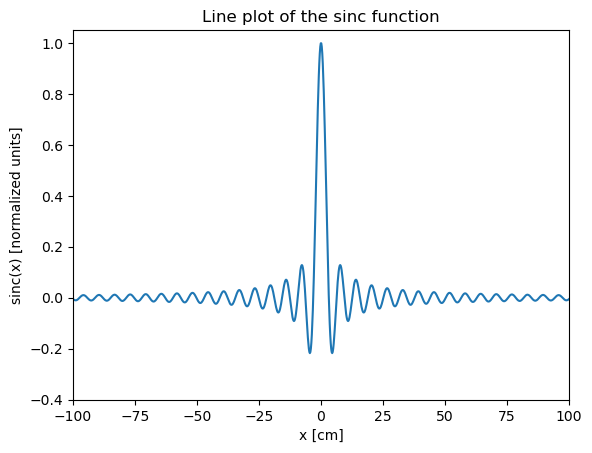

In [148]:
#Create the data to plot (note, it is not plotting a function, but 2 arrays)
x = np.linspace(-100,100,1000)
y = np.sin(x)/x

#plot x versus y
plt.plot(x,y)

#label the y axis - always label your axes!
plt.ylabel("sinc(x) [normalized units]");

#label the x axis
plt.xlabel("x [cm]")

#give the plot a title
plt.title("Line plot of the sinc function")

#show the plot
plt.axis([-100,100,-.4,1.05])

# Save the figure in the current drive as a pdf or png 
plt.savefig("figure.pdf")
plt.savefig("figure.png")
plt.show()

Take a moment to figure things out.  Let's figure out how to do the following:
* How do you change the x range to be -40 to 40?
* How do you change the y range to be -0.5 to 1.5
* How do you change the font size of various elements to 18?
* How do you change the colors and transparency of the line?

### Customizing Plots

You can also change the plot type.

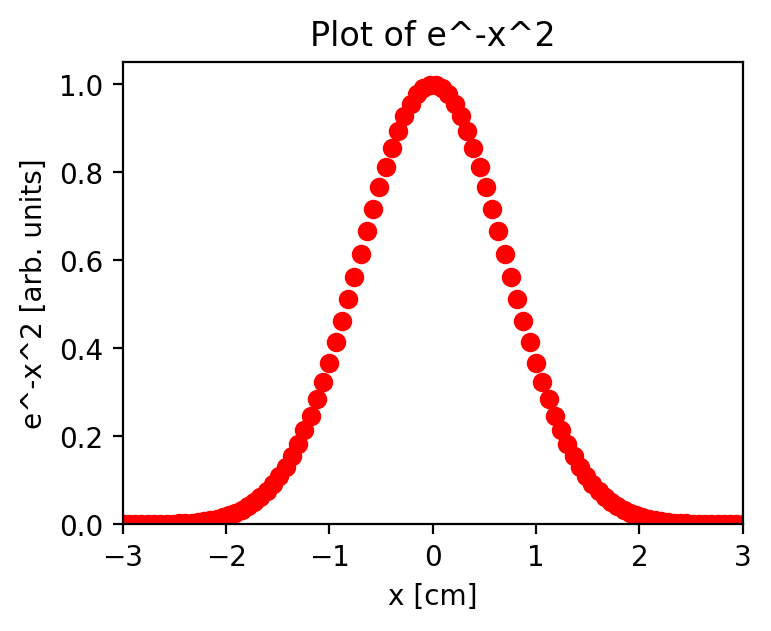

In [149]:
x = np.linspace(-3,3,100)
y = np.exp(-x**2)
fig = plt.figure(figsize=(4,3), dpi=200)
plt.plot(x,y,"ro"); #red dots on the plot
plt.ylabel("e^-x^2 [arb. units]");
plt.xlabel("x [cm]")
plt.title("Plot of e^-x^2")
plt.axis([-3,3,0,1.05])
plt.show()

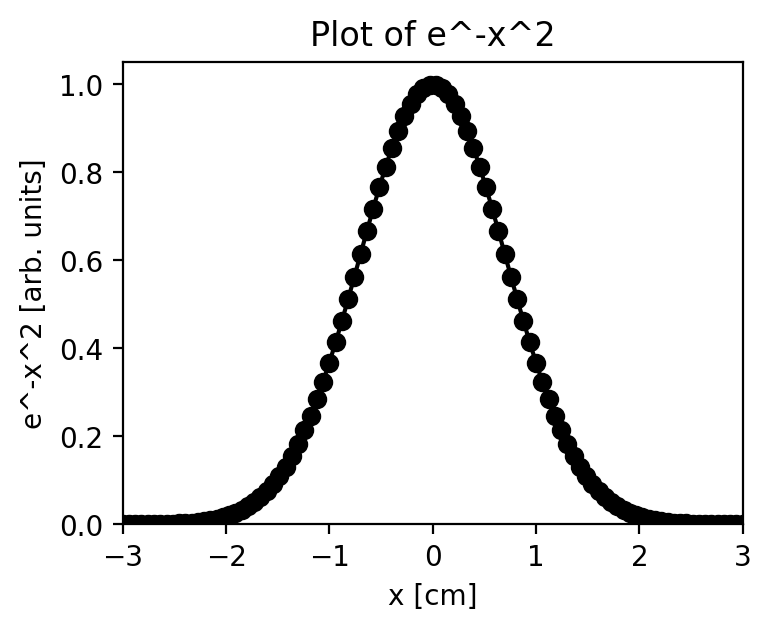

In [150]:
x = np.linspace(-3,3,100)
y = np.exp(-x**2)
fig = plt.figure(figsize=(4,3), dpi=200)
plt.plot(x,y,color='k',marker='o'); #black dots and a line on the plot
plt.ylabel("e^-x^2 [arb. units]");
plt.xlabel("x [cm]")
plt.title("Plot of e^-x^2")
plt.axis([-3,3,0,1.05])
plt.show()

There are many options you can adjust for the plot.  For a full list, see http://matplotlib.org/users/pyplot_tutorial.html

Here are some more examples. One of the things you'll notice is that in matplotlib you can include LaTeX mathematics in your labels by enclosing it in dollar signs.  In LaTeX to use Greek letters you use a backslash before the name of the letter, and other usually obvious characters.  To find out how to do anything with LaTeX, just Google it.

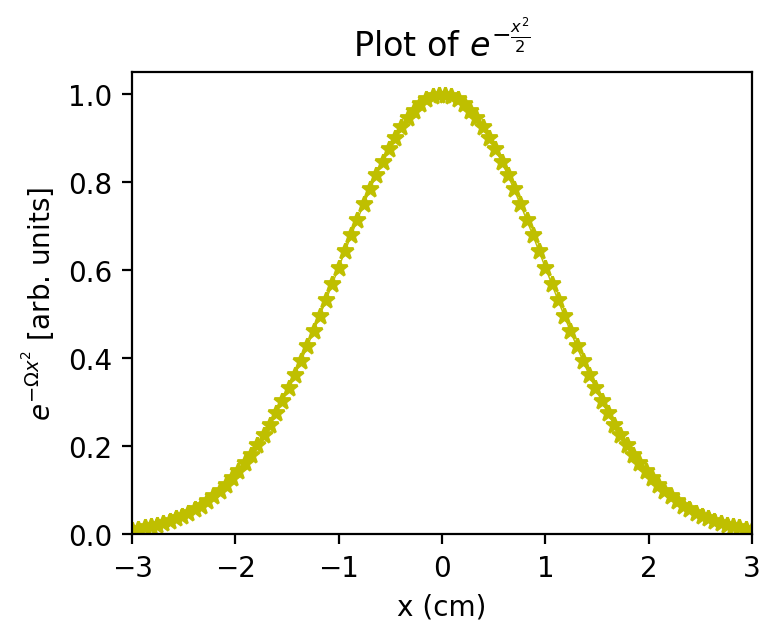

In [151]:
x = np.linspace(-3,3,100)
y = np.exp((-x**2)/2)
fig = plt.figure(figsize=(4,3), dpi=200)
plt.plot(x,y,color='y',marker="*", linewidth=0.5); 
plt.ylabel("$e^{-\\Omega x^2}$ [arb. units]");
plt.xlabel("x (cm)")
plt.title("Plot of $e^{-\\frac{x^2}{2}}$")
plt.axis([-3,3,0,1.05])
plt.show()

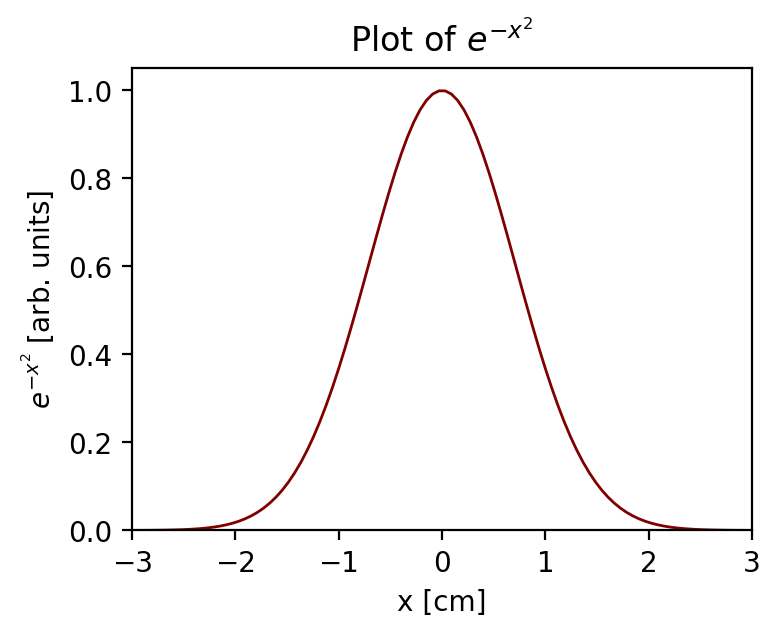

In [152]:
x = np.linspace(-3,3,100)
y = np.exp(-x**2)
fig = plt.figure(figsize=(4,3), dpi=200)
plt.plot(x,y,marker="",linewidth=1,color="maroon"); 
plt.ylabel("$e^{-x^2}$ [arb. units]");
plt.xlabel("x [cm]")
plt.title("Plot of $e^{-x^2}$")
plt.axis([-3,3,0,1.05])
plt.show()

### Plotting multiple lines

You can also plot multiple lines on a plot. If you include a `label` parameter for each plot, invoking the legend command, which puts the legend on the plot.

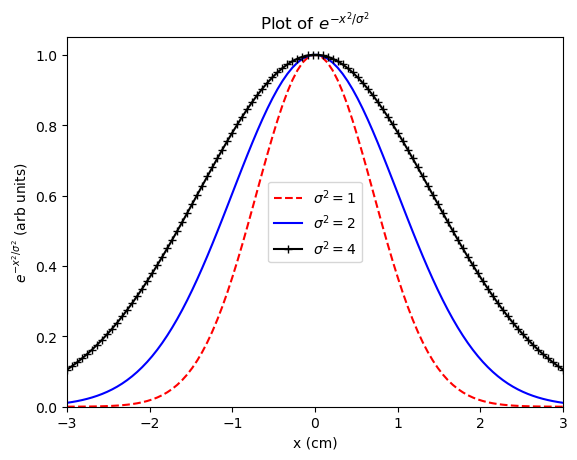

In [153]:
x = np.linspace(-3,3,100)

# Line 0
y = np.exp(-x**2)
plt.plot(x,y,marker="", color="r", 
         linestyle="--", label="$\sigma^2 = 1$"); 

# Line 1
y1 = np.exp(-x**2/2)
plt.plot(x,y1,color="blue", 
         label="$\sigma^2 = 2$")

# Line 2
y2 = np.exp(-x**2/4)
plt.plot(x,y2,color="black", 
         marker = "+", label="$\sigma^2 = 4$")

# Add labels, title, legend, etc.
plt.ylabel("$e^{-x^2/\sigma^2}$ (arb units)");
plt.xlabel("x (cm)")
plt.title("Plot of $e^{-x^2/\sigma^2}$")
plt.legend(loc='center')
plt.axis([-3,3,0,1.05])
plt.show()

### Hacking time!

Create a plot that with both $\sin(x)$ and $\cos(x)$ from -$2\pi$ to $2\pi$ with the following formating rules:

* Dashed red line for sine.
* Solid blue line for cosine.
* Legend located in the lower left corner.
* Label the axes with $x$ and $f(x)$
* Add grid lines.

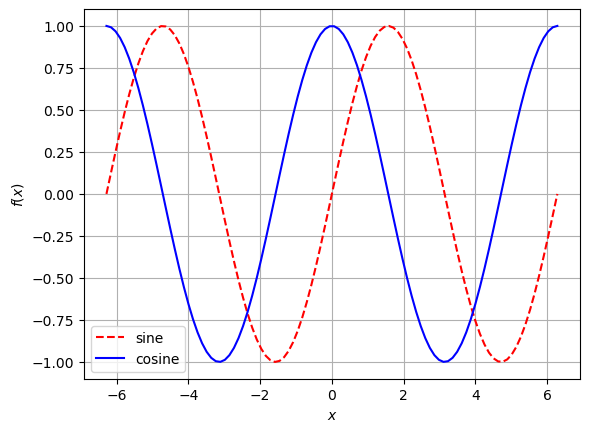

In [154]:
x = np.linspace(-2*np.pi,2*np.pi,100)
plt.plot(x, np.sin(x),color="red",linestyle="--",label="sine")
plt.plot(x, np.cos(x),color="blue",linestyle="-",label="cosine")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.grid(1)
plt.legend(loc="lower left")
plt.show()

Let's try some other types of plots.

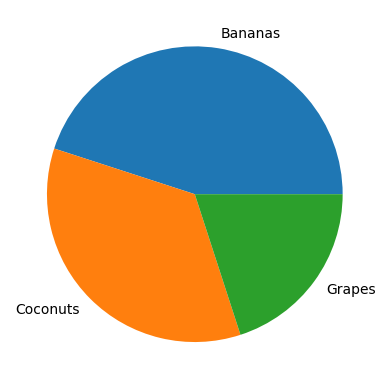

In [155]:
y = np.array([45, 35, 20])
mylabels = ["Bananas", "Coconuts", "Grapes"]
plt.pie(y, labels = mylabels)
plt.show() 

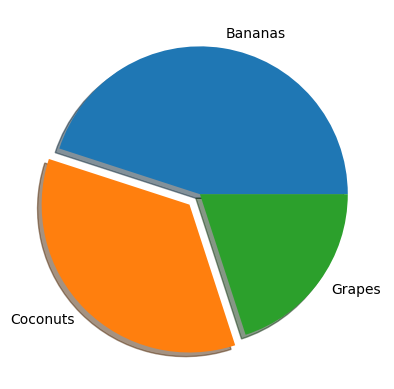

In [156]:
plt.pie(y, labels = mylabels, shadow=True, explode=(0,0.1,0))
plt.show() 

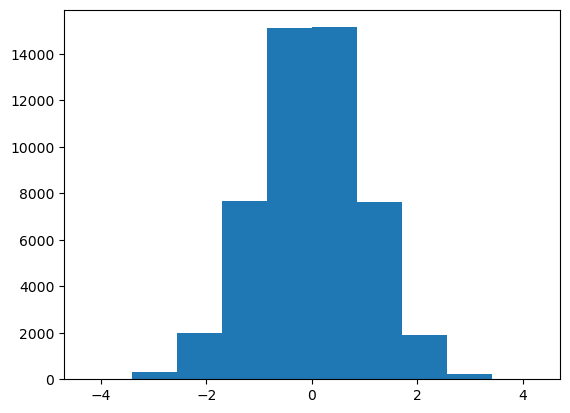

In [157]:
points = np.random.randn(50000)
plt.hist(points)
plt.show()

### Hacking time.

How can you improve this histogram plot?  What options are there?

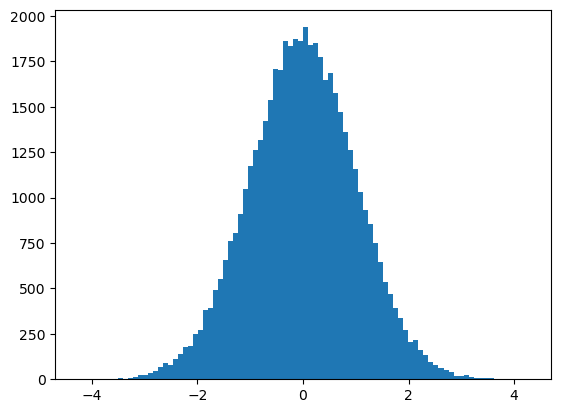

In [158]:
plt.hist(points,bins='scott',histtype='stepfilled')  # 'scott' is a rule for optimal histogram width.
plt.show()

Subplots can also be useful. What we have to do is to create "axes" first, and then plot within each of the axes. The plots are then created using methods of each `ax` object.

In [159]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

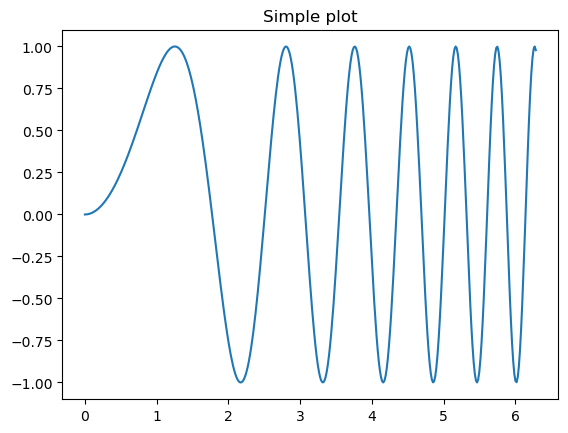

In [160]:
# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')
plt.show()

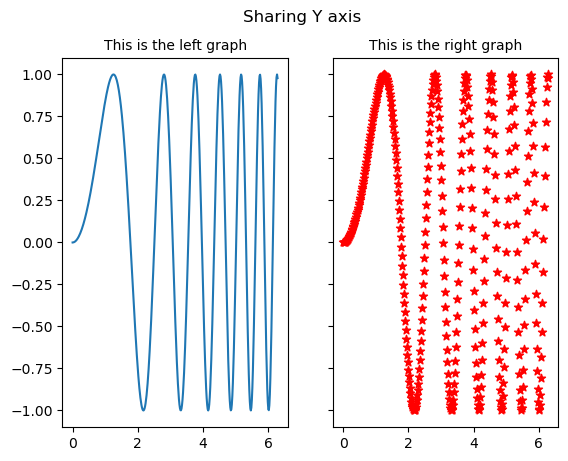

In [161]:
# Create two subplots and unpack the output array immediately
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle('Sharing Y axis')
ax1.plot(x, y)
ax1.set_title('This is the left graph',size=10)
ax2.scatter(x, y, color='r',marker='*')
ax2.set_title('This is the right graph',size=10)
plt.show()

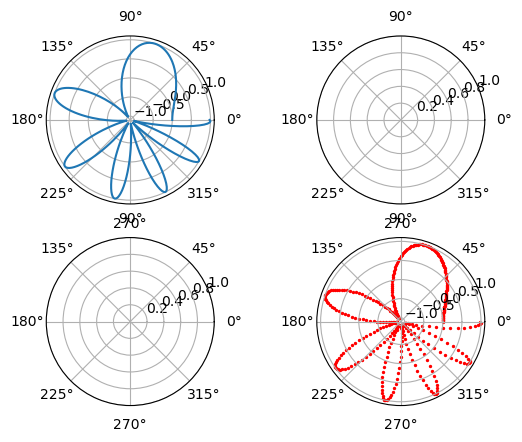

In [162]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axs[0,0].plot(x, y)
axs[1,1].scatter(x, y,s=2,c='red')
plt.show()

Fancier plots are also possible.  We'll introduce whatever you need as we go.

If you ever want to do something fancy in MatPlotLib, try starting with one of these examples: https://matplotlib.org/tutorials/index.html

What about trying other plot styles?  We can do this by calling `matplotlib.style.use(...)`.  Let's try the `ggplot` style that looks like the ggplot2 default style from R.

In [163]:
import matplotlib
matplotlib.style.use('ggplot')

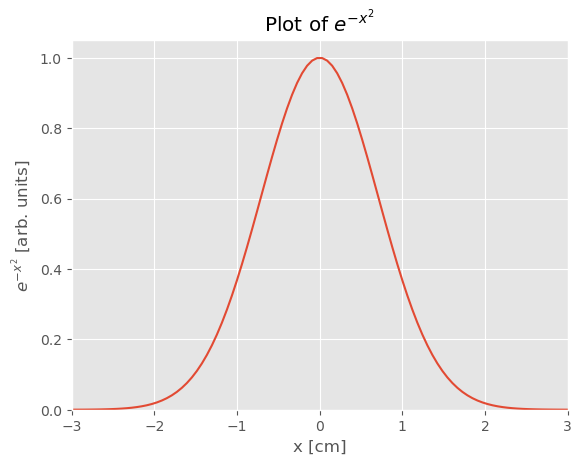

In [164]:
x = np.linspace(-3,3,100)
y = np.exp(-x**2)
plt.plot(x,y); 
plt.ylabel("$e^{-x^2}$ [arb. units]");
plt.xlabel("x [cm]")
plt.title("Plot of $e^{-x^2}$")
plt.axis([-3,3,0,1.05])
plt.show()

You can find the list of matplotlib styles [here](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html).

/var/folders/4v/g0zjp6c95535931grpmdq5840000gp/T/ipykernel_99960/1002017664.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use('seaborn-white')


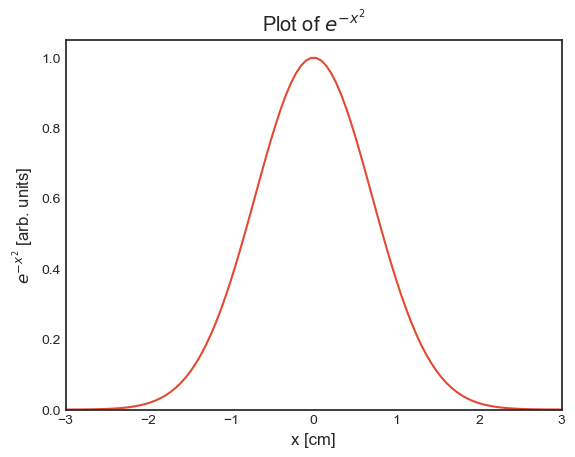

In [165]:
#Uncomment Try a few.
#matplotlib.style.use('fivethirtyeight')
#matplotlib.style.use('dark_background')
matplotlib.style.use('seaborn-white')
x = np.linspace(-3,3,100)
y = np.exp(-x**2)
plt.plot(x,y); 
plt.ylabel("$e^{-x^2}$ [arb. units]");
plt.xlabel("x [cm]")
plt.title("Plot of $e^{-x^2}$")
plt.axis([-3,3,0,1.05])
plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

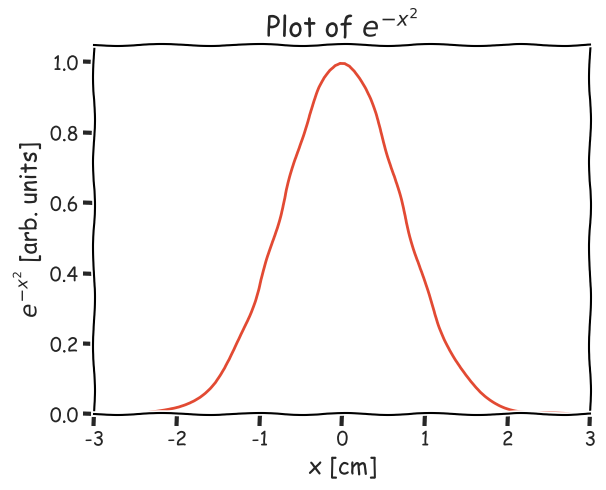

In [166]:
#And a bonus style called a bit differently
with plt.xkcd():
    x = np.linspace(-3,3,100)
    y = np.exp(-x**2)
    plt.plot(x,y); 
    plt.ylabel("$e^{-x^2}$ [arb. units]");
    plt.xlabel("x [cm]")
    plt.title("Plot of $e^{-x^2}$")
    plt.axis([-3,3,0,1.05])
    plt.show()

### Plots with eror bars

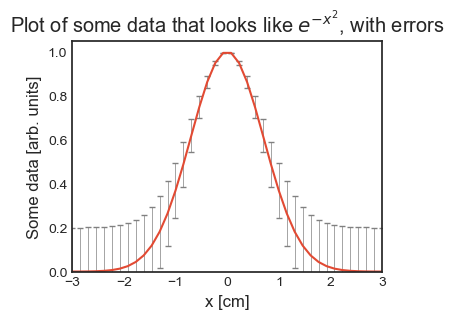

In [167]:
x = np.linspace(-3,3,40)
y = np.exp(-x**2)
fig = plt.figure(figsize=(4,3),dpi=100)
plt.errorbar(x,y,yerr=np.abs(0.2*(1-y)),capsize=2.5,elinewidth=0.5,ecolor='gray');
plt.ylabel("Some data [arb. units]");
plt.xlabel("x [cm]")
plt.title("Plot of some data that looks like $e^{-x^2}$, with errors")
plt.axis([-3,3,0,1.05])
plt.show()

**Hacking:** Given the data below: 
1. On the same plot, plot two *scatter* plots with error bars in x and y in different colors.  Include a legend. Change the marker and the error bar properties.
2. On two different vertically aligned subplots, plot scatter plots with error bars. Label the individual plots with the data series name. Make the error bars style different from the plot above.

In [168]:
lenp = 20
x = np.random.rand(lenp)
xerr = 0.07*np.ones(lenp) 
y1 = np.log(x)+0.3*np.random.rand(lenp) #Data series A
y2 = 4*np.sin(4*x)+0.3*np.random.rand(lenp)  #Data series B
yerr = 0.5*np.linspace(1,2,lenp)*x

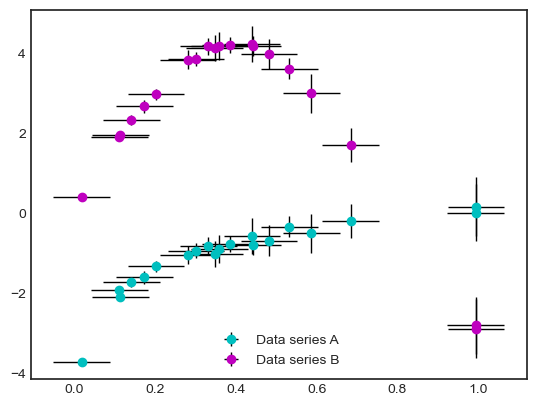

In [169]:
plt.errorbar(x,y1,fmt='co',elinewidth=1.0,xerr=xerr,yerr=yerr,label='Data series A',ecolor='k')
plt.errorbar(x,y2, fmt='mo',elinewidth=1.0,xerr=xerr,yerr=yerr,label='Data series B',ecolor='k')
plt.legend(loc='lower center')
plt.show()

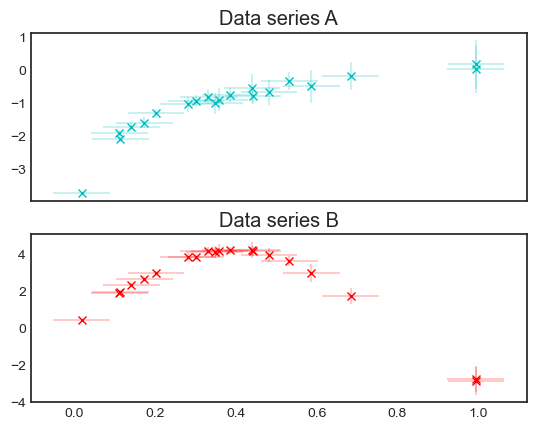

In [170]:
fig,(ax1,ax2) = plt.subplots(2, 1, sharex=True)
ax1.errorbar(x,y1,fmt='cx',xerr=xerr,yerr=yerr,label='Data series A',elinewidth=0.3)
ax2.errorbar(x,y2, fmt='rx',xerr=xerr,yerr=yerr,label='Data series B',elinewidth=0.3)
ax1.set_title('Data series A')
ax2.set_title('Data series B')
plt.show()


## Pandas, the data science package

#### 1. Creating and loading data with ``pandas``

#### 2. Cleaning and manipulating data with ``pandas``

#### 3. Graphing data with ``pandas`` and ``matplotlib`` 

## 1. Loading data with ``pandas``

With this simple Python computation experience under our belt, we can now move to doing some more interesting analysis.

### Loading Data with Pandas

In [171]:
import pandas as pd  # we use it a lot, import under a shortened name, using "import as"
import matplotlib.pyplot as plt  # we will do some plotting.
%matplotlib inline

## Pandas

Pandas is built on top of the NumPy package, meaning a lot of the structure of NumPy is used or replicated in Pandas. Data in Pandas is often used to feed statistical analysis in SciPy, plotting functions from Matplotlib, and machine learning algorithms in Scikit-learn. 

Two primary components are `Series` and `DataFrame`. The pandas `Series` object can be interpreted as an enhanced numpy 1D array and the pandas `DataFrame` as an enhanced numpy 2D array. 


In [172]:
sr = pd.Series([1, 3, 5, np.nan, 6, 8]) 
sr

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

NaN's are used to indicate missing data; *pandas datatypes automatically skip/ignore them*, whereas with numpy arrays need special error handling or they die on missing or inappropriate data.  This is very useful if you only have partial or messy data.

The main difference is that pandas series and pandas dataframes has *explicit* indices, while numpy arrays have implicit indexation.  Which means the indices can be any set of numbers, ordered any way one wants.

In [175]:
labels = np.arange(0,20,2)

In [176]:
somet = pd.Series(np.exp(-0.5*labels),index=labels)
somet

0     1.000000
2     0.367879
4     0.135335
6     0.049787
8     0.018316
10    0.006738
12    0.002479
14    0.000912
16    0.000335
18    0.000123
dtype: float64

The ``head()`` and ``tail()`` methods show us the first and last rows of the data

In [177]:
somet.head()

0    1.000000
2    0.367879
4    0.135335
6    0.049787
8    0.018316
dtype: float64

In [178]:
somet.tail()

10    0.006738
12    0.002479
14    0.000912
16    0.000335
18    0.000123
dtype: float64

Can be referenced like dictionaries using indices.

In [179]:
somet[4]  # using the key

0.1353352832366127

And like arrays (using slice notation for the positions, not the indices)

In [180]:
somet.iloc[3] #iloc is index location, note the brackets.

0.049787068367863944

In [181]:
somet.iloc[2:7]

4     0.135335
6     0.049787
8     0.018316
10    0.006738
12    0.002479
dtype: float64

When there is no chance of misinterpretation, can use slice notation directly without using iloc.

In [182]:
somet[2:7]  

4     0.135335
6     0.049787
8     0.018316
10    0.006738
12    0.002479
dtype: float64

Many other attributes and methods that Pandas has.

In [183]:
print(somet.is_monotonic_decreasing)
print(somet.is_unique)

True
True


In [184]:
somet.argmin()

9

We can operate on series like an array with numpy element-wise functions, using the `apply` method.

In [185]:
somet.apply(np.arccos)

0     0.000000
2     1.194069
4     1.435044
6     1.520989
8     1.552480
10    1.564058
12    1.568318
14    1.569884
16    1.570461
18    1.570673
dtype: float64

Series objects are freuqently used for timeseries datas in economics and statistics.  So pandas "feels" more natural to use for database-like data (e.g. csv, excel, and sql files), whereas numpy "feels" more natural for numeric processing of data (e.g. numerical data, images, etc.). You can do many of the same things in both libraries; you can even create pandas data frames from numpy arrays and vice-versa.

In [186]:
npa = np.array(somet)  # convert back to numpy
npa

array([1.00000000e+00, 3.67879441e-01, 1.35335283e-01, 4.97870684e-02,
       1.83156389e-02, 6.73794700e-03, 2.47875218e-03, 9.11881966e-04,
       3.35462628e-04, 1.23409804e-04])

In [187]:
pd.Series(npa)

0    1.000000
1    0.367879
2    0.135335
3    0.049787
4    0.018316
5    0.006738
6    0.002479
7    0.000912
8    0.000335
9    0.000123
dtype: float64

**Play around**: What other methods can you find to operate on panda series?

### DataFrames

A DataFrame is the more common way to interact with data using pandas.  It's essentially an enhanced 2D array, again with indices.  The difference between a dataframe and a 2D array is that in numpy, ALL the elements need to be the data type, whereas in a DataFrame, only each column needs to be the same datatype. Different columns can be different data types.

Operationally, we can create a dataframe using a dictionary of series *the same size*.

In [188]:
t = np.linspace(0,1.0,10)
x = np.exp(t)
y = np.exp(-t)
g = [chr(int(9*i)+65) for i in x]   # create some characters from X

In [189]:
df = pd.DataFrame({'t':t,'x':x,'y':y,'g':g})
df

,t,x,y,g
0,0.000000,1.000000,1.000000,J
1,0.111111,1.117519,0.894839,K
2,0.222222,1.248849,0.800737,L
3,0.333333,1.395612,0.716531,M
4,0.444444,1.559623,0.641180,O
5,0.555556,1.742909,0.573753,P
6,0.666667,1.947734,0.513417,R
7,0.777778,2.176630,0.459426,T
8,0.888889,2.432425,0.411112,V
9,1.000000,2.718282,0.367879,Y


Each column of a dataframe is a series.

In [190]:
type(df['x'])

pandas.core.series.Series

It contains different data types

In [191]:
df.dtypes

t    float64
x    float64
y    float64
g     object
dtype: object

`head()` and `tail()` still work.

In [192]:
df.head()

,t,x,y,g
0,0.000000,1.000000,1.000000,J
1,0.111111,1.117519,0.894839,K
2,0.222222,1.248849,0.800737,L
3,0.333333,1.395612,0.716531,M
4,0.444444,1.559623,0.641180,O


We can also create dataframes from files. We can use the ``read_csv`` command to read the comma-separated-value data. You personally will need to specify the correct directory that you put the file in.

In [193]:
df.tail()

,t,x,y,g
5,0.555556,1.742909,0.573753,P
6,0.666667,1.947734,0.513417,R
7,0.777778,2.176630,0.459426,T
8,0.888889,2.432425,0.411112,V
9,1.000000,2.718282,0.367879,Y


We can set one of the columns to be the indices

In [194]:
df_labeled = df.set_index('g')

We can select rows by index of location

In [195]:
df_labeled.iloc[1:4]

,t,x,y
g,,,
K,0.111111,1.117519,0.894839
L,0.222222,1.248849,0.800737
M,0.333333,1.395612,0.716531


In [196]:
df_labeled.loc['O']

t    0.444444
x    1.559623
y    0.641180
Name: O, dtype: float64

Some complex selection options! What do these do?

In [197]:
df_labeled.loc['R':]

,t,x,y
g,,,
R,0.666667,1.947734,0.513417
T,0.777778,2.176630,0.459426
V,0.888889,2.432425,0.411112
Y,1.000000,2.718282,0.367879


In [198]:
df_labeled.loc['O':'V',['t','x']]

,t,x
g,,
O,0.444444,1.559623
P,0.555556,1.742909
R,0.666667,1.947734
T,0.777778,2.176630
V,0.888889,2.432425


There are a lot of `pandas` methods!

In [199]:
df.mean()

TypeError: Could not convert ['JKLMOPRTVY'] to numeric

**Play around**. What do the methods `describe()`, `sort_values()`, `sort_index()` and `transpose()` do?

More common is to import data into dataframes. Now we can use the ``read_csv`` command to read the comma-separated-value data. You will need to specify the correct directory that you put the file in.

In [203]:
data = pd.read_csv('../data/HCEPDB_100K_cleaned.csv')

This is a selection of the Harvard Clean Energy Project Database of computed quantum mechanical properties of a very large database of molecules.  The non-obvious ones are:

   * SMILES_str = text representation of them molecules.
   * PCE = Photon Conversion Efficiency
   * E_HOMO = Energy of the highest occupied energy level
   * E_LUMO = Energy of the lowest occupied energy level
   * VOC = Open circut voltage
   * JSC = Short circut current 

In [204]:
data.head()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha
0,655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656
1,1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074
2,21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368
3,65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025
4,720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680


In [205]:
data.tail()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha
99994,2438907,C1C=Cc2c1c1[se]c3cc(ccc3c1c1ccccc21)-c1cccc2c[...,C27H17NSe,434.3983,1.708065,0.448396,58.625950,-5.048396,2.299883,-2.748514
99995,931581,C1C=c2c3C=CCc3c3[se]c4cc(oc4c3c2=C1)-c1nccc2ns...,C21H11N3OSSe,432.3639,6.299115,0.349363,277.491824,-4.949363,1.145048,-3.804315
99996,145151,C1C=c2c3C=CCc3c3[se]c4cc(C5=CC=C[SiH2]5)c5cscc...,C24H16SSeSi,443.5024,2.431874,0.202702,184.642140,-4.802702,1.518063,-3.284639
99997,440066,C1C=Cc2c1c1[se]c3cc(ccc3c1c1cocc21)C1=CC=C[SiH2]1,C21H14OSeSi,389.3866,3.328305,0.534701,95.798667,-5.134701,1.994568,-3.140133
99998,2602759,C1C=Cc2c1c1[se]c3cc(-c4scc5C=C[SiH2]c45)c4cocc...,C25H14O2SSeSi,485.4956,3.200800,0.424100,116.154981,-5.024100,1.866968,-3.157132


The ``shape`` attribute shows us the number of elements:

In [206]:
data.shape

(99999, 10)

The ``columns`` attribute gives us the column names

In [207]:
data.columns

Index(['id', 'SMILES_str', 'stoich_str', 'mass', 'pce', 'voc', 'jsc',
       'e_homo_alpha', 'e_gap_alpha', 'e_lumo_alpha'],
      dtype='object')

The ``index`` attribute gives us the index names

In [208]:
data.index

RangeIndex(start=0, stop=99999, step=1)

Like series, we can use our own indices, instead of the integer labels that were used. 
Let's make our ``id`` column the ``index``

In [209]:
data.set_index('id',inplace=True)  # inplace means to edit THIS dataframe, not create a new one

Now let's revisit the ``data.index``

In [210]:
data.index

Index([ 655365, 1245190,   21847,   65553,  720918, 1310744,  196637,  262174,
        393249,      35,
       ...
       2012894,  702176, 2504420,  734951, 2301564, 2438907,  931581,  145151,
        440066, 2602759],
      dtype='int64', name='id', length=99999)

and the data shape

In [211]:
data.shape

(99999, 9)

View it with head again:

In [212]:
data.head()

,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha
id,,,,,,,,,
655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656
1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074
21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368
65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025
720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680


In [213]:
data.tail()

,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha
id,,,,,,,,,
2438907,C1C=Cc2c1c1[se]c3cc(ccc3c1c1ccccc21)-c1cccc2c[...,C27H17NSe,434.3983,1.708065,0.448396,58.625950,-5.048396,2.299883,-2.748514
931581,C1C=c2c3C=CCc3c3[se]c4cc(oc4c3c2=C1)-c1nccc2ns...,C21H11N3OSSe,432.3639,6.299115,0.349363,277.491824,-4.949363,1.145048,-3.804315
145151,C1C=c2c3C=CCc3c3[se]c4cc(C5=CC=C[SiH2]5)c5cscc...,C24H16SSeSi,443.5024,2.431874,0.202702,184.642140,-4.802702,1.518063,-3.284639
440066,C1C=Cc2c1c1[se]c3cc(ccc3c1c1cocc21)C1=CC=C[SiH2]1,C21H14OSeSi,389.3866,3.328305,0.534701,95.798667,-5.134701,1.994568,-3.140133
2602759,C1C=Cc2c1c1[se]c3cc(-c4scc5C=C[SiH2]c45)c4cocc...,C25H14O2SSeSi,485.4956,3.200800,0.424100,116.154981,-5.024100,1.866968,-3.157132


The ``dtypes`` attribute gives the data types of each column:

In [214]:
data.dtypes

SMILES_str       object
stoich_str       object
mass            float64
pce             float64
voc             float64
jsc             float64
e_homo_alpha    float64
e_gap_alpha     float64
e_lumo_alpha    float64
dtype: object

## More manipulating dataframes with ``pandas``

Here we'll cover some key features of manipulating data with pandas

Access columns by name using square-bracket indexing, like a dictionary

In [215]:
data['mass']

id
655365     394.3151
1245190    400.4135
21847      363.4903
65553      319.4448
720918     379.3398
             ...   
2438907    434.3983
931581     432.3639
145151     443.5024
440066     389.3866
2602759    485.4956
Name: mass, Length: 99999, dtype: float64

Mathematical operations on columns happen *element-wise* (note 18.01528 is the weight of H$_2$O):

In [216]:
data['mass'] / 18.01528

id
655365     21.887814
1245190    22.226327
21847      20.176778
65553      17.731881
720918     21.056559
             ...    
2438907    24.112770
931581     23.999843
145151     24.618124
440066     21.614241
2602759    26.949101
Name: mass, Length: 99999, dtype: float64

Columns can be created (or overwritten) with the assignment operator.
Let's create a *mass_ratio_H_2O* column with the mass ratio of each molecule to H$_2$O

In [217]:
data['mass_ratio_H2O'] = data['mass'] / 18.01528

In [218]:
data.head()

,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,mass_ratio_H2O
id,,,,,,,,,,
655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,21.887814
1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,22.226327
21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,20.176778
65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,17.731881
720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,21.056559


In preparation for grouping the data, let's bin the molecules by their molecular mass. For that, we'll use ``pd.cut``, with the `10` below being then number of bins (check `pd.cut?`, right?). There are a variety of ways to express the bins.

In [221]:
data['mass_group'] = pd.cut(data['mass'], 10)

In [222]:
pd.cut?

### Simple Grouping of Data

The real power of Pandas comes in its tools for grouping and aggregating data. Here we'll look at *value counts* and the basics of *group-by* operations.

#### Value Counts

Pandas includes an array of useful functionality for manipulating and analyzing tabular data.
We'll take a look at two of these here.

The ``pandas.value_counts`` returns statistics on the unique values within each column.

We can use it, for example, to break down the molecules by their mass group that we just created:

In [223]:
pd.value_counts(data['mass_group'])

mass_group
(377.376, 419.204]    31543
(419.204, 461.032]    23414
(335.549, 377.376]    20966
(461.032, 502.86]      9175
(293.721, 335.549]     8393
(251.893, 293.721]     2948
(502.86, 544.687]      2525
(210.066, 251.893]      687
(544.687, 586.515]      246
(167.82, 210.066]       102
Name: count, dtype: int64

What happens if we try this on a (theoretically) continuous valued variable?

In [224]:
pd.value_counts(data['mass'])

mass
387.5123    349
403.5793    349
393.5405    334
404.5674    319
353.5195    305
           ... 
291.3371      1
344.2633      1
303.4717      1
351.1283      1
403.5073      1
Name: count, Length: 2784, dtype: int64

We can do a little data exploration with this to look 0s in columns.  Here, let's look at the power conversion effeciency (``pce``)

In [225]:
pd.value_counts(data['pce'])

pce
0.000000    1706
5.161953       1
2.866730       1
5.977362       1
4.413202       1
            ... 
2.118119       1
3.341839       1
4.603801       1
3.711259       1
3.200800       1
Name: count, Length: 98294, dtype: int64

## Hacking time
Play around with the data set.  What new Pandas functions can you find to operate on it? Post interesting ones into chat.

## Visualizing data with ``pandas``

Of course, looking at tables of data is not very intuitive.
Fortunately Pandas has many useful plotting functions built-in, all of which make use of the ``matplotlib`` library to generate plots.

Now we can simply call the ``plot()`` method of any series or dataframe (it's a method of the dataframe!) to get a reasonable view of the data. We'll get into the details of `matplotlib` next week.

In [226]:
pd.value_counts(data['mass_group'])

mass_group
(377.376, 419.204]    31543
(419.204, 461.032]    23414
(335.549, 377.376]    20966
(461.032, 502.86]      9175
(293.721, 335.549]     8393
(251.893, 293.721]     2948
(502.86, 544.687]      2525
(210.066, 251.893]      687
(544.687, 586.515]      246
(167.82, 210.066]       102
Name: count, dtype: int64

### Other plot types

Pandas supports a range of other plotting types; you can find these by using the <TAB> autocomplete on the ``plot`` method:

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([ 9.5,  9.6,  9.7,  9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5]),
 <BarContainer object of 10 artists>)

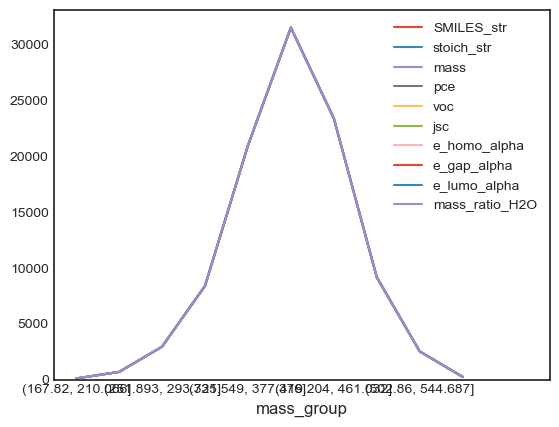

In [227]:
data.groupby(['mass_group']).count().plot().hist(10)

Let's do some nicer plots ones.  Let's start with PCE (power conversion efficency) vs HOMO (highest occupied molecular orbital) energy.

In [228]:
plt.rcParams['agg.path.chunksize'] = 10000  
#we'll need this because of some size issues with some plots.

To make it a bit faster, let's take a sample of the data

In [229]:
data_sample = data.sample(frac=0.1)

In [230]:
data_sample.shape

(10000, 11)

<Axes: xlabel='pce', ylabel='e_homo_alpha'>

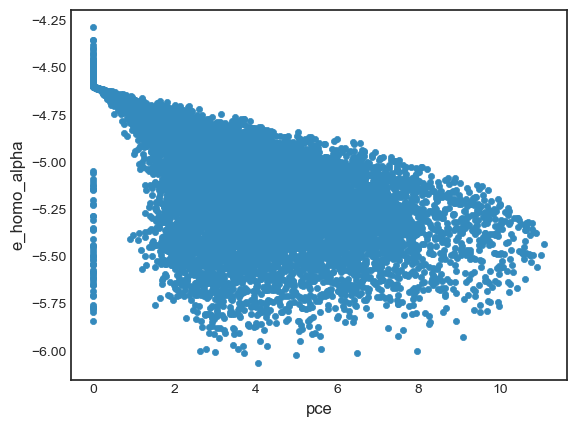

In [231]:
data_sample.plot.scatter('pce', 'e_homo_alpha')

This thing is UGLY! Let's see if we can't pretty it up. First thing is that pd.plot.XXX returns a plot object that we can modify before it gets rendered by calling certain methods on the object. Remember you can always use the Jupyter notebook tab completion after an object to find out what methods are available.

In [232]:
data_sample.plot?

That's a bit better, but there are still some things we can do to make it look nicer.  Like put it on a grid and make the y-axis label more accurate and increase the size as well as setting the aspect ratio.

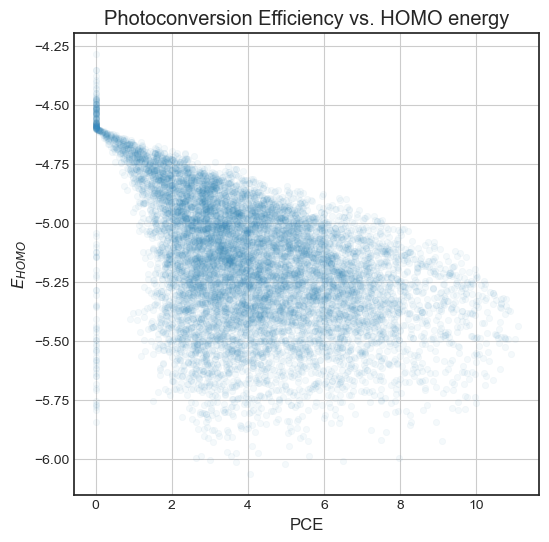

In [233]:
p_vs_homo_plt = data_sample.plot('pce', 'e_homo_alpha', kind='scatter', figsize=(6,6), alpha = 0.05)
p_vs_homo_plt.set_xlabel('PCE')
p_vs_homo_plt.set_ylabel('$E_{HOMO}$')
p_vs_homo_plt.set_title('Photoconversion Efficiency vs. HOMO energy')
p_vs_homo_plt.grid()

## Hacking time
Play around with plots of the data set.  What patterns can you find when you relate the data elements to each other via plotting?

### The pandas visualization tools documentation is really good:
* [docs here](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

One thing that is very useful is a scatterplot matrix to show the relationship between variables.  Let's make one now.  Be patient as this makes a lot of plots!

array([[<AxesSubplot:xlabel='mass', ylabel='mass'>,
        <AxesSubplot:xlabel='pce', ylabel='mass'>,
        <AxesSubplot:xlabel='voc', ylabel='mass'>,
        <AxesSubplot:xlabel='jsc', ylabel='mass'>,
        <AxesSubplot:xlabel='e_homo_alpha', ylabel='mass'>,
        <AxesSubplot:xlabel='e_gap_alpha', ylabel='mass'>,
        <AxesSubplot:xlabel='e_lumo_alpha', ylabel='mass'>,
        <AxesSubplot:xlabel='mass_ratio_H2O', ylabel='mass'>],
       [<AxesSubplot:xlabel='mass', ylabel='pce'>,
        <AxesSubplot:xlabel='pce', ylabel='pce'>,
        <AxesSubplot:xlabel='voc', ylabel='pce'>,
        <AxesSubplot:xlabel='jsc', ylabel='pce'>,
        <AxesSubplot:xlabel='e_homo_alpha', ylabel='pce'>,
        <AxesSubplot:xlabel='e_gap_alpha', ylabel='pce'>,
        <AxesSubplot:xlabel='e_lumo_alpha', ylabel='pce'>,
        <AxesSubplot:xlabel='mass_ratio_H2O', ylabel='pce'>],
       [<AxesSubplot:xlabel='mass', ylabel='voc'>,
        <AxesSubplot:xlabel='pce', ylabel='voc'>,
        <Axes

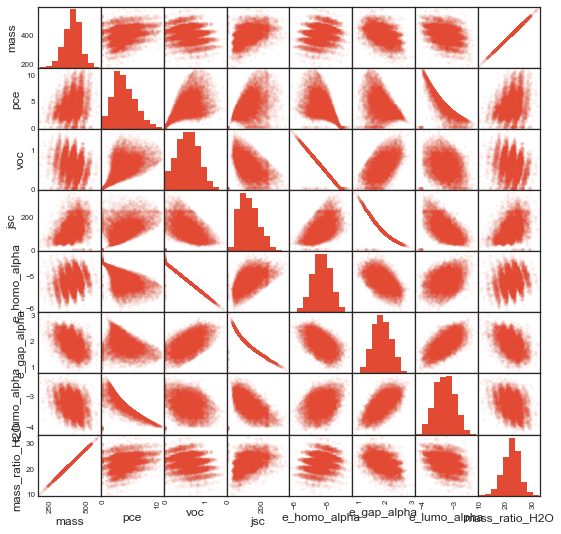

In [208]:
pd.plotting.scatter_matrix(data_sample, figsize=(9,9), alpha=0.05)

That's . . . a lot of data! But it does give us a quick overview of the relationship between all the variables in the data frame.

In [234]:
data_sample.head()

,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,mass_ratio_H2O,mass_group
id,,,,,,,,,,,
1102833,[SiH2]1C=c2c3C=C[SiH2]c3c3ccc4cc(C5=CC=C[SiH2]...,C24H19NSi3,405.6791,5.195861,0.461807,173.158938,-5.061807,1.567949,-3.493858,22.518612,"(377.376, 419.204]"
2987764,C1C=Cc2c1c1c(c3cocc23)c2c3nsnc3c(cc2c2=C[SiH2]...,C25H14N2OS2Si,450.6166,7.525059,0.454191,254.987287,-5.054191,1.216358,-3.837833,25.013022,"(419.204, 461.032]"
15017,[SiH2]1C=CC=C1c1cc2oc3c(cnc4ccncc34)c2cn1,C17H11N3OSi,301.3799,2.781151,1.388091,30.835727,-5.988091,2.628236,-3.359855,16.729127,"(293.721, 335.549]"
1295923,[SiH2]1C=Cc2[se]c3c(ncc4cc(ccc34)-c3scc4nccnc3...,C19H11N3SSeSi,420.4289,6.954608,0.949100,112.773864,-5.549100,1.884777,-3.664323,23.337350,"(419.204, 461.032]"
309633,C1C=CC=C1c1cc2sc3c4occc4[se]c3c2c2c[nH]cc12,C19H11NOSSe,380.3279,1.091191,0.177964,94.365982,-4.777964,2.005100,-2.772865,21.111407,"(377.376, 419.204]"


OK, moving on, let's look at making density plots.  These show the probability density of particular values for a variable.  Notice how we used a different way of specifying the plot type.

<Axes: ylabel='Density'>

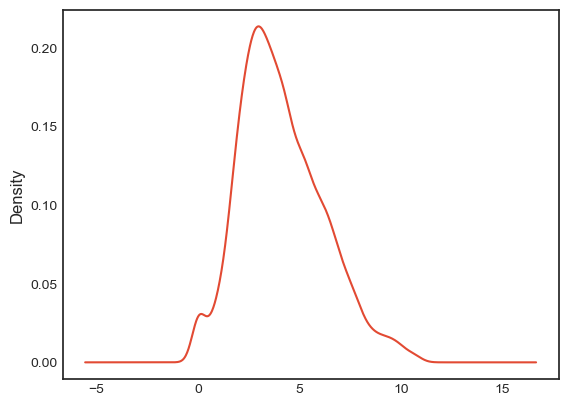

In [235]:
data_sample['pce'].plot(kind='kde')

Let's plot the kde overtop of the histogram.  The key here is to use a secondary axis.  First we save the plot object to `ax` then pass that to the second plot. We'll see some easier methods soon . . . 

<Axes: >

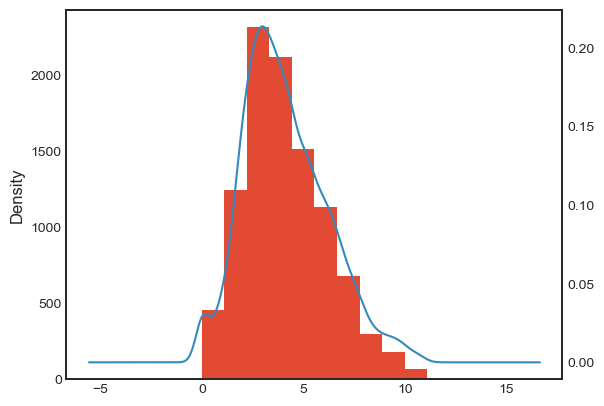

In [236]:
ax = data_sample['pce'].plot(kind='hist')
data_sample['pce'].plot(kind='kde', ax=ax, secondary_y=True)

## Seaborn for fun and pretty pictures!
Matplotlib is great for basic scatter plots, bar plots, time series, etc.  But if we want to do really fancy plots, we need to look to other tools like Seaborn.  This is a super quick intro to seaborn. If you don't have seaborn, you can install it with `conda install seaborn` then import it. Seaborn is set up to work with Pandas; Matplotlib which was never really defined for dataframes.

In [237]:
import seaborn as sns

We'll make three different contour / surface plots.
* Basic contour plot
* Density plot

Examples roughly taken from [here](https://python-graph-gallery.com/1136-2/).

In [238]:
sns.set_style('white') # set some defaults

In [239]:
ds2 = data_sample.sample(frac=0.2) # let's downsample a bit more for speed purposes.

<Axes: xlabel='pce', ylabel='e_homo_alpha'>

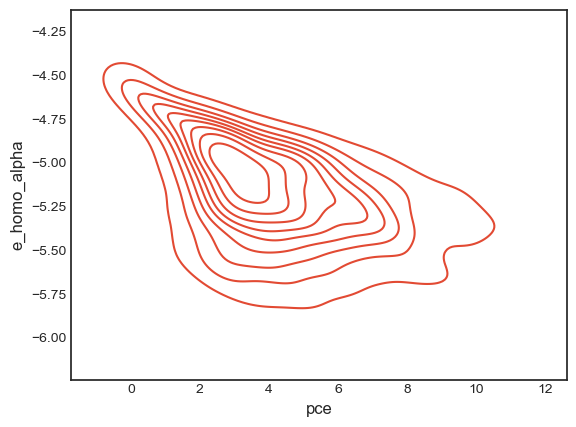

In [240]:
sns.kdeplot(x=ds2['pce'], y=ds2['e_homo_alpha'])

/var/folders/4v/g0zjp6c95535931grpmdq5840000gp/T/ipykernel_99960/3660967552.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=ds2['pce'], y=ds2['e_homo_alpha'], cmap='Reds', shade=True, bw_method=0.15)


<Axes: xlabel='pce', ylabel='e_homo_alpha'>

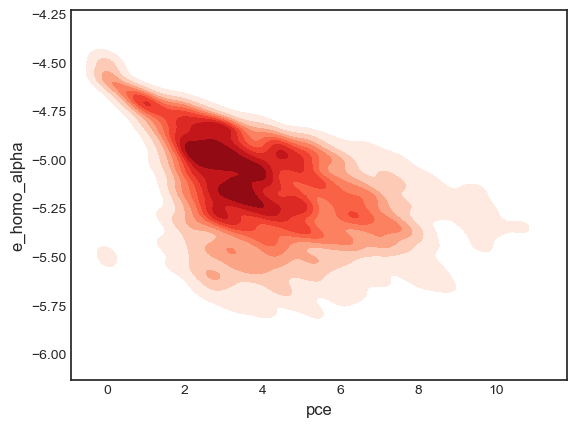

In [241]:
sns.kdeplot(x=ds2['pce'], y=ds2['e_homo_alpha'], cmap='Reds', shade=True, bw_method=0.15)

Let's check out some other options that make things much easier than before.

/Users/mrshirts/opt/anaconda3/envs/python_classes/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


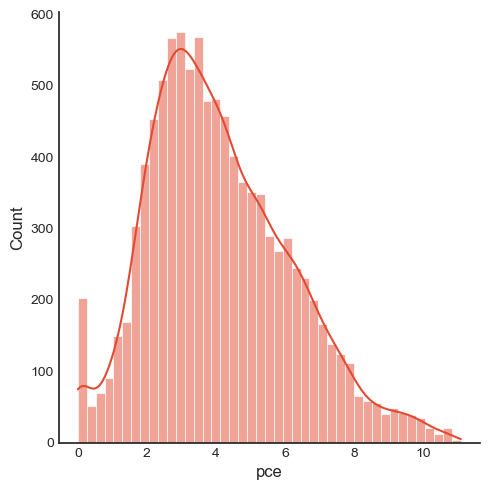

In [242]:
sns.displot(data_sample['pce'],kde=True)

### Hacking time!
What other things can you do with `displot`? What other seaborn plots can you find, in both 1D and 2D?